We have our dataset in the google drive so to access the dataset we are trying to mount our drive with this notebook.

In [ ]:
from google.colab import drive #mounting our drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import os

DATASET_PATH = '/content/drive/MyDrive/dataset' #the path of drive where the dataset lies 
for dirname, _, filenames in os.walk(DATASET_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (118).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (122).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (126).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (113).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (104).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (105).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (110).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (114).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (101).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (127).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (11).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (115).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (120).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (106).jpg
/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (121).jpg
/content/dr

### importing libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

### Folder paths

In [ ]:
X_train = []
Y_train = []
image_size = 150    
TRAINING_PATH = '/content/drive/MyDrive/dataset/Training'
TESTING_PATH = '/content/drive/MyDrive/dataset/Testing'
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join(TRAINING_PATH, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(TESTING_PATH, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

### Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential()

model.add(Conv2D(32,(3,3),padding='same', activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 25s 114ms/step - loss: 1.6069 - accuracy: 0.4801 - val_loss: 1.1916 - val_accuracy: 0.4796
Epoch 2/30
83/83 [==============================] - 7s 84ms/step - loss: 1.2878 - accuracy: 0.5369 - val_loss: 1.1374 - val_accuracy: 0.5680
Epoch 3/30
83/83 [==============================] - 7s 86ms/step - loss: 1.1725 - accuracy: 0.5755 - val_loss: 2.2337 - val_accuracy: 0.3163
Epoch 4/30
83/83 [==============================] - 7s 86ms/step - loss: 1.0471 - accuracy: 0.5989 - val_loss: 5.5172 - val_accuracy: 0.2925
Epoch 5/30
83/83 [==============================] - 7s 86ms/step - loss: 0.9743 - accuracy: 0.6394 - val_loss: 2.1035 - val_accuracy: 0.4116
Epoch 6/30
83/83 [==============================] - 7s 87ms/step - loss: 0.8628 - accuracy: 0.6716 - val_loss: 3.6533 - val_accuracy: 0.3129
Epoch 7/30
83/83 [==============================] - 7s 87ms/step - loss: 0.8294 - accuracy: 0.6742 - val_loss: 1.9791 - val_accuracy: 0.3980
Epoch 8/30


### evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

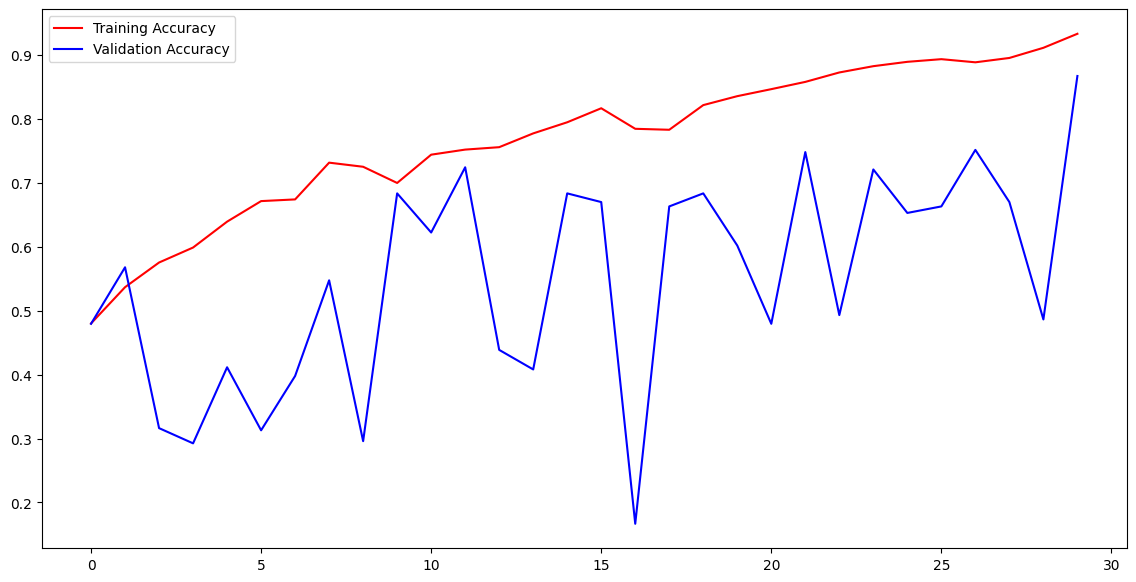

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

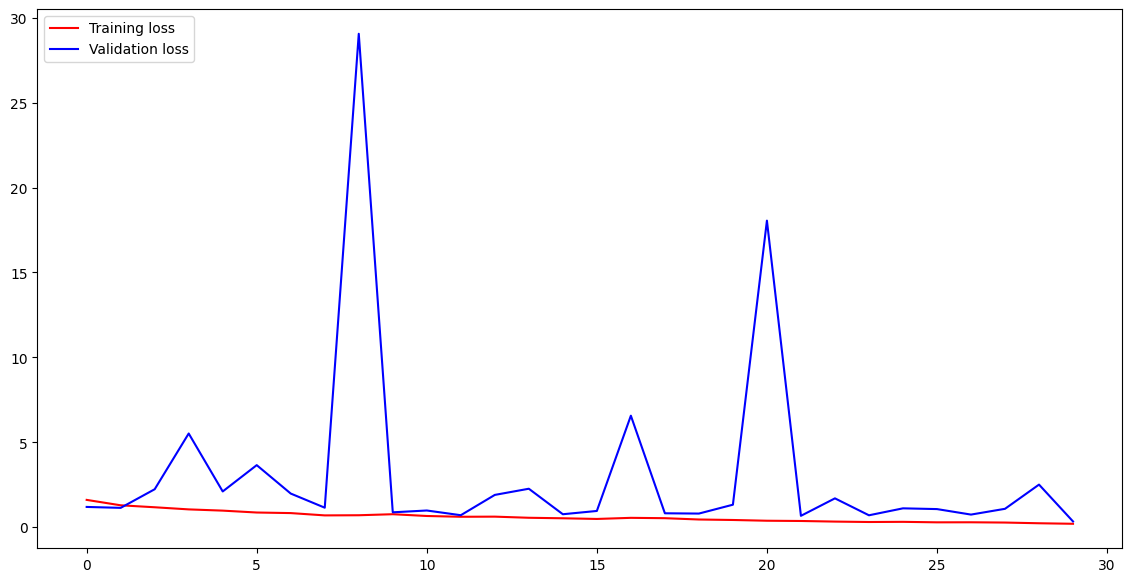

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('Training Accuracy:', acc[-1])
print('Validation Accuracy:', val_acc[-1])


Training Accuracy: 0.9334089756011963
Validation Accuracy: 0.8673469424247742


In [ ]:
_, acc = model.evaluate(X_test,y_test)
print('Test Accuracy:', acc)


11/11 [==============================] - 1s 56ms/step - loss: 0.3454 - accuracy: 0.8838
Test Accuracy: 0.8837920427322388


### prediction

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

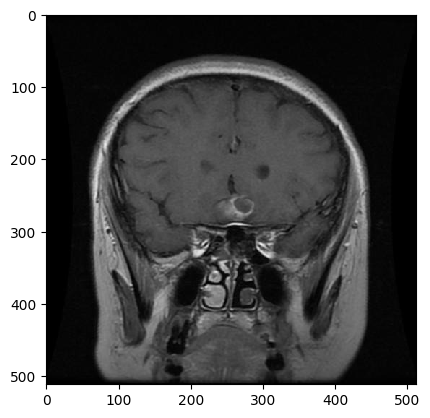

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
# plt.imshow(img)
plt.show()

In [ ]:
a=model.predict(img_array)
print(labels[a.argmax()])

1/1 [==============================] - 0s 373ms/step
pituitary_tumor


In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/dataset/Training/no_tumor/image(67).jpg')
img2 = cv2.resize(img2,(150,150))
img_array2 = np.array(img2)
img_array2.shape

(150, 150, 3)

In [ ]:
img_array2 = img_array2.reshape(1,150,150,3)
img_array2.shape

(1, 150, 150, 3)

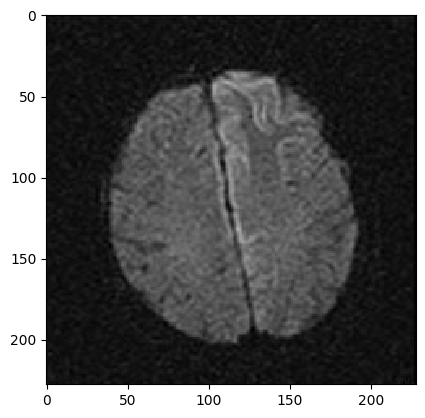

In [ ]:
from tensorflow.keras.preprocessing import image
img2 = image.load_img('/content/drive/MyDrive/dataset/Training/no_tumor/image(68).jpg')
plt.imshow(img2,interpolation='nearest')
# plt.imshow(img)
plt.show()

In [ ]:
a2=model.predict(img_array2)
print(labels[a2.argmax()])

1/1 [==============================] - 0s 25ms/step
no_tumor


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Converting predictions from one-hot encoding to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Converting true labels from one-hot encoding to integer labels
y_true_labels = np.argmax(y_test, axis=1)

# Computing precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 0s 15ms/step
Precision: 0.8845595355748948
Recall: 0.8837920489296636
F1 Score: 0.8833200260245097


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Print confusion matrix
print(cm)


[[82 10  0  1]
 [13 76  2  4]
 [ 4  1 46  1]
 [ 0  2  0 85]]


<Axes: >

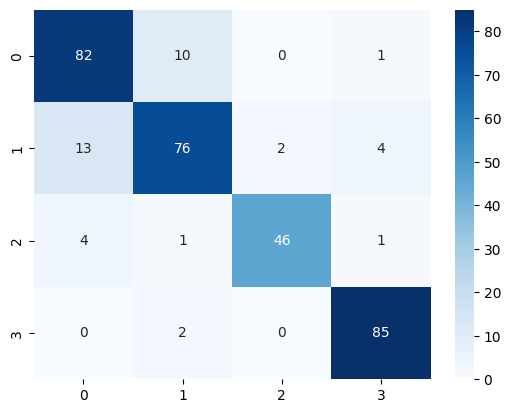

In [ ]:
import seaborn as sns

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
import cv2
import sklearn

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Keras version:", keras.__version__)
print("OpenCV (cv2) version:", cv2.__version__)
print("scikit-learn (sklearn) version:", sklearn.__version__)
print("tensorflow version :", tf.__version__)


NumPy version: 1.22.4
Pandas version: 1.5.3
Keras version: 2.12.0
OpenCV (cv2) version: 4.7.0
scikit-learn (sklearn) version: 1.2.2
tensorflow version : 2.12.0
